# Pymaceuticals Inc.
---

### Analysis

 
The Pymaceuticals data analysis focused on comparing the performance of Capomulin against other treatment regimens for squamous cell carcinoma. The treatment was conducted on a study group of 249 mice with SCC tumors. 

The summary statistics chart displayed the tumor volume (mm3) for each drug regimen. The following statistics were calculated: mean, median, mode, variance, standard deviation, and standard error. The bar chart (figure 1) shows the timepoints for all the mice in each drug regimen. This figure aids in visualizing how long each treatment lasted. Additionally, a pie chart was used for figure 2 to show the distribution of male and female mice present in the study. Out of the total 249, there were slightly more male mice than females. 

A second chart was added to analyze the final tumor volume (mm3) of each mouse. The chart includes the timepoint, metastatic sites, drug regimen, sex (male or female), age (in months), and weight (g). The data from this chart helped to calculate the interquartile ranges, and examine potential outliers. One outlier was found for infubinol at approximately 36 (mm3). Box plots (figure 3) were created to illustrate the tumor volume (mm3) ranges for each treatment; the outlier is also identified on this figure.

Analysis was narrowed down to one mouse (l509) that was in the Capomulin treatment group. A line plot (figure 4) displays the tumor volume (mm3) that was taken for each timepoint (days). The chart aids in visualizing the progression of the tumor during the treatment period. 

The next part of the analysis was to examine if there was a correlation between the average tumor volume (mm3) and the average mouse weight (g). A scatter plot (figure 5) was generated to showcase this data. This data was only taken for the mice treated with Capomulin. Additionally, a linear regression model (figure 6) was used to indicate a correlation. Between the two variables, weight and tumor volume (mm3), the calculated correlation coefficient was approximately 0.84.

   A few key observations can be taken away from the analysis. First, a correlation between weight (g) and average tumor volume (mm3) is present. This suggests that larger mice will have larger tumors, however, further analysis would need to be conducted to find the causation of this observation. Second, across the different drug regimens, Capomulin and Ramicane had the lowest mean, median, variance, standard deviation, and standard error for tumor volume (mm3). Lastly, Infubinol and Ceftamin displayed the largest ranges of tumor volumes compared to the other drug regimens. Infubinol also had the only outlier which could suggest this treatment has less consistent outcomes, or an error occured during the study. Further analysis is needed to investigate the reason behind the outlier.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID",how="left")

# Display the data table for preview
merge_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
total_mice=merge_df["Mouse ID"].nunique()
print(total_mice)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df=merge_df.loc[merge_df["Mouse ID"] == "g989",:] 
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean=clean_df["Mouse ID"].nunique()
print(total_mice_clean)

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


mean_tumor_volume=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_tumor_volume=clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_tumor_volume=clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_tumor_volume=clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_tumor_volume=clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df=pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                                    "Median Tumor Volume":median_tumor_volume,
                                    "Tumor Volume Variance":var_tumor_volume,
                                    "Tumor Volume Std.Dev":std_tumor_volume,
                                    "Tumor Volume Std.Err.":sem_tumor_volume
                                   
})

summary_statistics_df

C:\Users\Natalia\AppData\Local\Temp\ipykernel_27168\4042311751.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tumor_volume=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
C:\Users\Natalia\AppData\Local\Temp\ipykernel_27168\4042311751.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tumor_volume=clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
C:\Users\Natalia\AppData\Local\Temp\ipykernel_27168\4042311751.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Eith

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_agg=clean_df.groupby("Drug Regimen").aggregate({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
                                                            
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

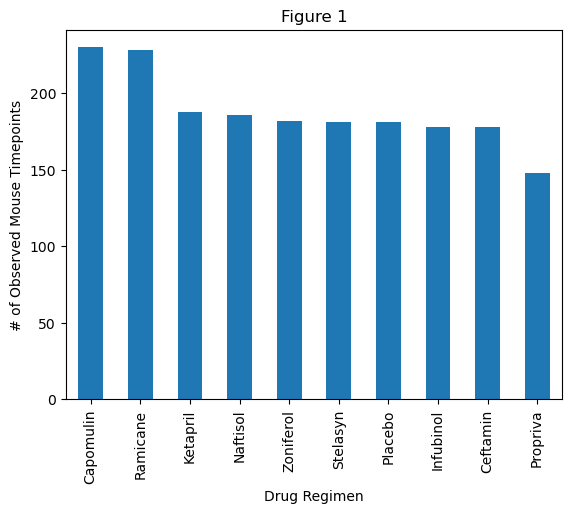

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_chart_count = clean_df['Drug Regimen'].value_counts()
mouse_bar_graph=mouse_chart_count.plot(kind='bar')
mouse_bar_graph.set_xlabel("Drug Regimen")
mouse_bar_graph.set_ylabel("# of Observed Mouse Timepoints")
plt.title("Figure 1")
plt.show()


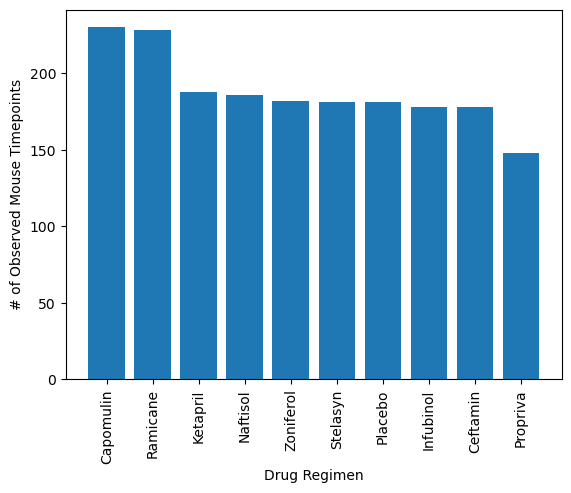

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mouse_chart_count.index
y_axis=mouse_chart_count.values
plt.bar(x_axis,y_axis)
tick_locations=[value for value in x_axis]
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

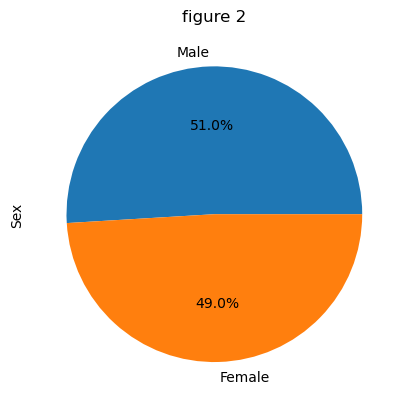

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_pie_count = clean_df['Sex'].value_counts()
mouse_pie_graph=mouse_pie_count.plot(kind='pie',autopct="%1.1f%%")
plt.title("figure 2")
plt.show()

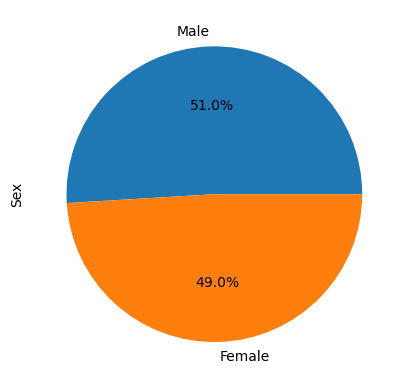

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_pie_count.values,labels=mouse_pie_count.index,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df=clean_df.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge_df=pd.merge(max_timepoint_df,clean_df,how="left",on=["Mouse ID","Timepoint"])
max_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumor_df=max_merge_df.loc[max_merge_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append( Tumor_df)
    
    # Determine outliers using upper and lower bounds
    q1 = Tumor_df.quantile(0.25)
    q3 = Tumor_df.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = Tumor_df.loc[(Tumor_df < fence_low) | (Tumor_df > fence_high)]
    print(f"{treatment}'s potential outliers: {df_out}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


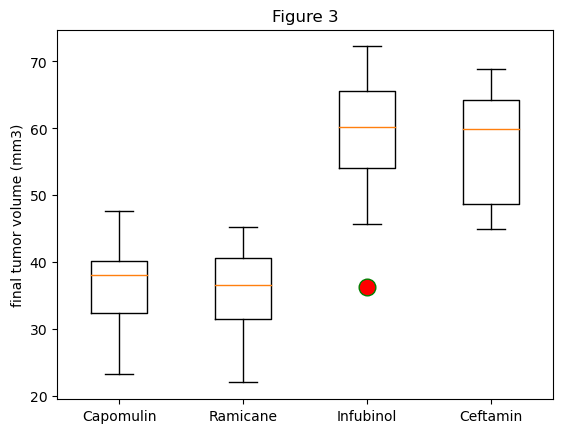

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
linestyle='none', markeredgecolor='g')
plt.boxplot(tumor_list,labels=treatment_list,flierprops=flierprops)
plt.title("Figure 3")
plt.ylabel("final tumor volume (mm3)")
plt.show()

## Line and Scatter Plots

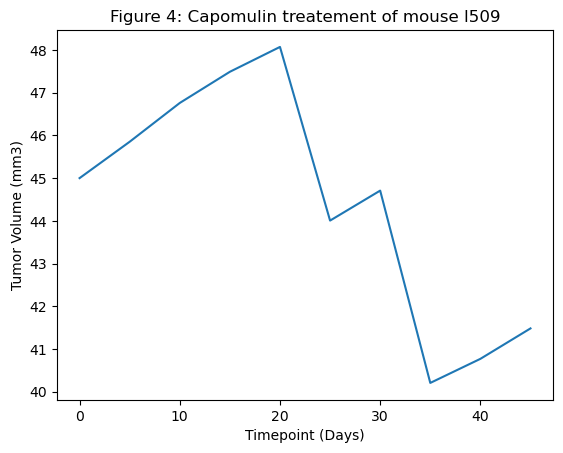

In [26]:
l509_df=clean_df.loc[clean_df["Mouse ID"]=="l509"]
x=l509_df["Timepoint"]
y=l509_df["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.title("Figure 4: Capomulin treatement of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

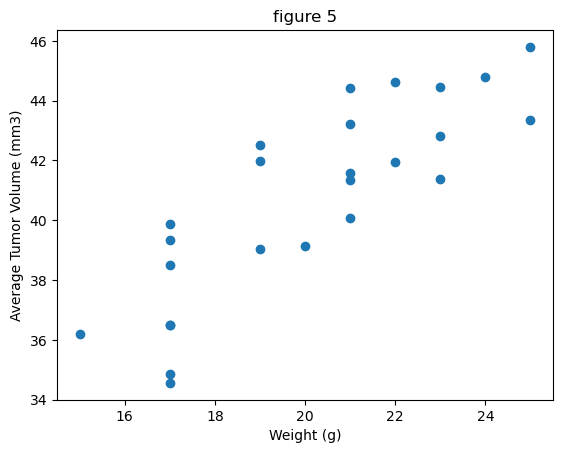

In [27]:
capomulin_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulin_agg_df=capomulin_df.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
x=capomulin_agg_df["Weight (g)"]
y=capomulin_agg_df["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.title("figure 5")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


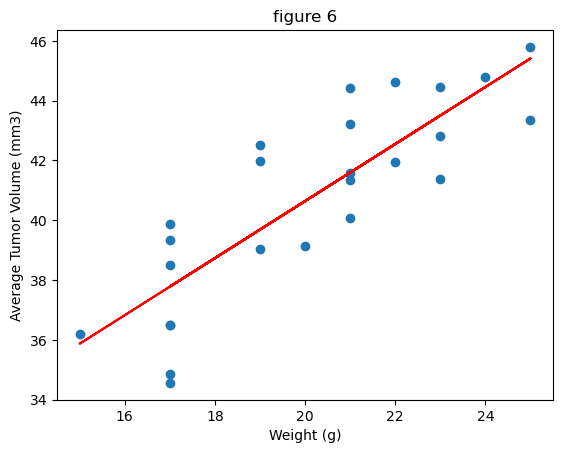

In [28]:
capomulin_df=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulin_agg_df=capomulin_df.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
x=capomulin_agg_df["Weight (g)"]
y=capomulin_agg_df["Tumor Volume (mm3)"]
plt.scatter(x,y)
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
y_values=slope*x+intercept
plt.plot(x,y_values,color="r")
plt.title("figure 6")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(r_value,2)}")
plt.show()